ปฏิบัติการครั้งที่ 4 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้น share แล้วส่ง link ใน mango.cmu.ac.th

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้ หรือรันโค้ดข้างล่าง
https://donlapark.pages.dev/229351/data/Auto.csv  

In [1]:
!wget https://donlapark.pages.dev/229351/data/Auto.csv

--2023-12-14 04:03:38--  https://donlapark.pages.dev/229351/data/Auto.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv’

Auto.csv            100%[===================>]  17.66K  --.-KB/s    in 0s      

2023-12-14 04:03:38 (47.7 MB/s) - ‘Auto.csv’ saved [18079/18079]



In [3]:
# import module ที่ต้องใช้
import numpy as np  # ใช้เอาค่าข้อมูลมาบวกหรือหาค่าเฉลี่ยกัน ฯลฯ
import pandas as pd
from scipy import stats

In [4]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto_df = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto_df = auto_df.dropna() # drop แถวที่มีข้อมูลหายไป (แถวที่มี '?')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
auto_df.info() # Check ว่าไม่มีข้อมูลที่ขาดหายหรือยัง

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


* Predictor: `horsepower` $X = [x_1,x_2,\ldots,x_n]$
* Response: `mpg` $y = [y_1,y_2,\ldots,y_n]$
* สมการ $\hat{y}_i = \hat{\beta}_0+\hat{\beta}_1x_i, \ \ \ \ $     $ i=1,2,\ldots,n$  

In [8]:
X = auto_df['horsepower']
y = auto_df['mpg']

คำนวณสัมประสิทธิ์ $\hat{\beta}_0,\hat{\beta}_1$ ด้วยสูตร
\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2} \\
&= \frac{\text{Cov}(X,y)}{\text{Var}(X)}\\
\hat{\beta}_0 &= \bar{y}-\hat{\beta}_1\bar{x}
\end{align*}
  
ใช้คำสั่ง $\texttt{np.cov(X,y)}=\begin{pmatrix}
\text{Var}(X)  & \text{Cov}(X,y) \\
\text{Cov}(y,X)  & \text{Var}(y)
\end{pmatrix}
$ สำหรับ covariance matrix ระหว่างเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$  
ใช้คำสั่ง $\texttt{np.mean(X)}$ และ $\texttt{np.mean(y)}$ สำหรับค่าเฉลี่ยของเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$

#### Exercise 1:

- เติมโค้ดในฟังก์ชัน `linear_model` ที่คำนวณค่าสัมประสิทธิ์ (coefficients) จากข้อมูล `X` และ `y`
- เติมโค้ดในฟังก์ชัน `predict` ที่คำนวณค่าทำนาย จากข้อมูลตัวแปรต้น `X` และสัมประสิทธิ์ของโมเดล `beta_0` และ `beta_1`

In [74]:
# Let's start by implementing linear regression from scratch
# using numpy linear algebra

# ต้องได้แบบนี้
#                 coef
#---------------------
#const         39.9359
#horsepower    -0.1578

def linear_model(X, y):
    """X: numpy array เวกเตอร์ของตัวแปรต้น"""
    X = auto_df['horsepower']
    """y: numpy array เวกเตอร์ของตัวแปรตาม"""
    y = auto_df['mpg']
    """Return: (beta_0 , beta_1) <-- tuple ของสัมประสิทธิ์"""
    # หา beta_1
    mean_x = np.mean(X)
    mean_y = np.mean(y)

    sum1 = np.sum((X - mean_x)*(y - mean_y))
    sum2 = np.sum((X - mean_x)**2)
    beta_1 = sum1/sum2

    # หา beta_0
    beta_0 = (mean_y - (beta_1*mean_x))
    #TODO: COMPLETE THE FUNCTION
    return beta_0 , beta_1

# ต้องได้แบบนี้
#array([19.41604569, 13.89148002, 16.25915102, 16.25915102, 17.83759835,
#        8.68260382,  5.21001968,  5.99924335,  4.42079602,  9.94536168])

def predict(beta_0 , beta_1, X):
    """beta_0: ค่าตัดแกน"""
    """beta_1: ความชัน"""
    """X: เวกเตอร์ของตัวแปรต้น (Numpy หรือ Pandas)"""
    """Return: เวกเตอร์ของค่าทำนาย [y^_1, y^_2, ..., y^_n]"""
    Y = beta_0 + beta_1 * X
    return Y
    #TODO: COMPLETE THE FUNCTION
    #ได้ค่าทำนายของ mpg ของรถ X คัน



In [75]:
beta_0, beta_1 = linear_model(X, y)
y_pred = predict(beta_0 , beta_1, X)

# print สัมประสิทธิ์ที่เราได้ว่ามีค่าเป็นอะไรบ้าง
print(beta_0,beta_1)

39.93586102117047 -0.15784473335365362


In [76]:
# นับจำนวนข้อมูล

print(y.shape)

n = y.shape[0]
print(n)

(392,)
392


#### Exercise 2: คำนวณ Residual Sum of Squares (RSS)
$$ \text{RSS} = \sum_{i=1}^n (y_i-\hat{y}_i)^2 $$
โดยใช้คำสั่งต่อไปนี้

$\texttt{np.sum}([x_1,x_2,...,x_n])=x_1+x_2+...+x_n$

$\texttt{np.square}([x_1,x_2,...,x_n])=[x_1^2,x^2_2,...,x^2_n]$

In [84]:
# TODO: Calculate Residual Sum of Squares
# คำนวณผลต่างยกกำลังสอง แล้วเอามาบวกกันทั้งหมด [ใช้คำสั่งข้างบน]
RSS = np.sum(np.square(y - y_pred))

print(RSS)

9385.915871932419


#### Exercise 3: คำนวณ Residual Standard Error (RSE)  
$$  \text{RSE} = \sqrt{\frac{\text{RSS}}{n-2}} $$

In [89]:
# TODO: Calculate Residual Standard Error
# ตามสูตรเลยนะ
RSE = np.sqrt(RSS/n-2)

print(RSE)

4.68440635925227


#### Exercise 4: คำนวณ Standard Error (SE)  
\begin{align*}
\text{SE}(\hat{\beta}_0) &= \text{RSE}\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n (x_i-\bar{x})^2}} \\
\text{SE}(\hat{\beta}_1) &= \text{RSE}\sqrt{\frac{1}{\sum_{i=1}^n (x_i-\bar{x})^2}}
\end{align*}

In [90]:
# TODO: Calculate the standard error of each coefficients

# คำตอบคืออันนี้นะ
#                 coef    std err
#--------------------------------
#const         39.9359      0.717
#horsepower    -0.1578      0.006

# SE(β₀) คำนวณหาค่าเบี่ยงเบนของ β₀-hat
mean_x = np.mean(X)
sum2 = np.sum((X - mean_x)**2)

SE_beta_0 = RSE*np.sqrt((1/n)+((mean_x**2)/sum2))

# SE(β₁) คำนวณหาค่าเบี่ยงเบนของ β₁-hat
SE_beta_1 = RSE*np.sqrt(1/sum2)

print('SE(β₀): ', SE_beta_0)
print('SE(β₁): ', SE_beta_1)

SE(β₀):  0.685124705515508
SE(β₁):  0.006154675844885148


#### Exercise 5: คำนวณขอบล่าง (lower) และขอบบน (upper) ของ confidence interval
$$I_i = [\hat{\beta}_i-2\cdot\text{SE}(\hat{\beta}_i),\hat{\beta}_i+2\cdot\text{SE}(\hat{\beta}_i)]$$

In [94]:
# TODO: Calculate 95% confidence interval

# Confidence interval of β₀
# หาช่วงของ β₀
# ขอบเขตล่างของ β₀
lower_0 = (beta_0 - 2*SE_beta_0)
# ขอบเขตบนของ β₀
upper_0 = (beta_0 + 2*SE_beta_0)

# Confidence interval of β₁
lower_1 = (beta_1 - 2*SE_beta_1)
upper_1 = (beta_1 + 2*SE_beta_1)

print(f'Confidence interval of β₀: [{lower_0},{upper_0}]')
print(f'Confidence interval of β₁: [{lower_1},{upper_1}]')

# ช่วงความเชื่อมั่นที่  95% คือ ตรงนี้
#              [0.025      0.975]
#--------------------------------
#const         38.525      41.347
#horsepower    -0.171      -0.145

Confidence interval of β₀: [38.56561161013945,41.306110432201486]
Confidence interval of β₁: [-0.1701540850434239,-0.14553538166388333]


#### Code ข้างล่างนี้แสดงผลของค่าทั้งหมดที่เราคำนวณไปแล้ว

In [95]:
X = auto_df['horsepower']

# Present results
results = pd.DataFrame({'feature': ['Intercept', X.name],
                        'coefficients': [beta_0,beta_1],
                        'standard_error': [SE_beta_0,SE_beta_1],
                        '[0.025': [lower_0,lower_1],
                        '0.975]': [upper_0,upper_1]})

results

,feature,coefficients,standard_error,[0.025,0.975]
0,Intercept,39.935861,0.685125,38.565612,41.306110
1,horsepower,-0.157845,0.006155,-0.170154,-0.145535


## Linear Regression in `Scikit-Learn`

#### [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# ตั้งชื่อ Model ของเรา (ตัวแปรต้น, ตัวแปรตาม)
# เปลี่ยน array จาก 1 มิติให่เป็น 2 มิติใช้คำสั่ง .to_numpy()[:, None]
reg.fit(X.to_numpy()[:, None], y)

LinearRegression()

In [ ]:
# Attributes:

# การดึง beta1-hat
# coef_ : array of shape (n_features, ) or (n_targets, n_features)

# การดึงตัวตัดแกนหรือ beta0-hat
# intercept_ : float or array of shape (n_targets,)

#### ความชัน

In [10]:
reg.coef_

array([-0.15784473])

#### ค่าตัดแกน

In [11]:
reg.intercept_

39.93586102117047

#### ทำนายจากตัวแปรต้น

In [15]:
# อย่าลืมเปลี่ยนให้เป็น 2 มิติก่อน
reg.predict(X.to_numpy()[:10, None])  # ทำนายแค่ 10 แถวแรกของตัวแปรต้น (horsepower ของรถ 10 คันแรก)

array([19.41604569, 13.89148002, 16.25915102, 16.25915102, 17.83759835,
        8.68260382,  5.21001968,  5.99924335,  4.42079602,  9.94536168])

## Linear Regression in `statsmodels
"ใช้วิเคราะห์คำนวณทางสถิติต่อๆไป แนะนำให้ใช้อันนี้"
#### [Documentation](https://www.statsmodels.org/stable/regression.html)

#### มีสองวิธึในการ fit linear regression:

1. `statsmodels.api.sm.OLS`

In [16]:
import statsmodels.api as sm

In [17]:
y = auto_df['mpg']
X = auto_df['horsepower']

# add bias constant;
# without this the equation turns into y = βx
X_one = sm.add_constant(X)
# X_one คือ ข้อมูลที่ column แรกมีแต่เลข 1
X_one

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
392,1.0,86.0
393,1.0,52.0
394,1.0,84.0
395,1.0,79.0


In [20]:
# syntax is OLS(response, predictor)

# sm.ชนิดของโมเดล(ตัวแปรตาม, ตัวแปรต้น)
model1 = sm.OLS(y, X_one)
# fit ไม่ต้องใส่อะไรข้างใน
model1 = model1.fit()
print(model1.summary())
# ช่วงความเชื่อมั่นที่  95% คือ ตรงนี้
#              [0.025      0.975]
#--------------------------------
#const         38.525      41.347
#horsepower    -0.171      -0.145

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.03e-81
Time:                        04:33:49   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [21]:
# Make predictions
model1.predict(X_one)

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64

2. `statsmodels.formula.api.smf.ols`

In [22]:
import statsmodels.formula.api as smf

#syntax is ols(formula, dataset) # f ย่อมาจาก formula
# smf.ols('ตัวแปรตาม ~ ตัวแปรต้น', auto_df)
model2 = smf.ols('mpg ~ horsepower', auto_df)
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.03e-81
Time:                        04:36:14   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [24]:
# Make predictions ใช้ X ได้เลยไม่จำเป็นต้องใช้ X_one
y_pred = model2.predict(X)
model2.predict(X)

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64

#### Exercise 6: จงตอบคำถามต่อไปนี้

1. จากโมเดลนี้ ถ้ารถยนต์มีแรงม้า 200 hp จะมีระยะการวิ่งเท่าไหร่ต่อแกลลอน
2. บอกความหมายของช่วงความเชื่อมั่นของ $\beta_1$ ที่ได้
3. ระหว่างช่วงของสัมประสิทธิ์ $\beta_0$ กับ $\beta_1$ ช่วงไหนที่กว้างกว่ากัน

In [115]:
# 1.จากโมเดลนี้ ถ้ารถยนต์มีแรงม้า 200 hp จะมีระยะการวิ่งเท่าไหร่ต่อแกลลอน
mpg = beta_0 + beta_1*(200)
print("รถยนต์ที่มีแรงม้า 200 hp จะมีระยะการวิ่ง:", mpg, "ไมล์ต่อแกลลอน")

รถยนต์ที่มีแรงม้า 200 hp จะมีระยะการวิ่ง: 8.366914350439743 ไมล์ต่อแกลลอน


In [116]:
# 2.บอกความหมายของช่วงความเชื่อมั่นของ  β₁  ที่ได้
print("Confidence interval of β₁", [lower_1,upper_1])
print("--------------------------------------------------------------------------------------------------------------------------------------")
print("ความหมายของช่วงความเชื่อมั่นของ  β₁  ที่ได้ คือ เรามีความเชื่อมั่น 95% ว่าค่า β₁ หรือ mile per gallon จะตกอยู่ในช่วงนี้โดยทั้งสองค่ามีความสัมพันธ์ไปในทิศทางเดียวกัน")

Confidence interval of β₁ [-0.1701540850434239, -0.14553538166388333]
--------------------------------------------------------------------------------------------------------------------------------------
ความหมายของช่วงความเชื่อมั่นของ  β₁  ที่ได้ คือ เรามีความเชื่อมั่น 95% ว่าค่า β₁ หรือ mile per gallon จะตกอยู่ในช่วงนี้โดยทั้งสองค่ามีความสัมพันธ์ไปในทิศทางเดียวกัน


In [117]:
# 3.ระหว่างช่วงของสัมประสิทธิ์  β₀  กับ  β₁  ช่วงไหนที่กว้างกว่ากัน
print("Confidence interval of β₀:", [lower_0,upper_0])
print("Confidence interval of β₁:", [lower_1,upper_1])
beta_0_size = abs(lower_0 - upper_0)
beta_1_size = abs(lower_1 - upper_1)
print("Total confidence interval size of β₀ and β₁:",[beta_0_size,beta_1_size])
print("-----------------------------------")
print("สรุปได้ว่าช่วงสัมประสิทธิ์ของ β₀ กว้างกว่า β₁")

Confidence interval of β₀: [38.56561161013945, 41.306110432201486]
Confidence interval of β₁: [-0.1701540850434239, -0.14553538166388333]
Total confidence interval size of β₀ and β₁: [2.7404988220620368, 0.024618703379540585]
-----------------------------------
สรุปได้ว่าช่วงสัมประสิทธิ์ของ β₀ กว้างกว่า β₁


#### Extra: Plotting data and regression line

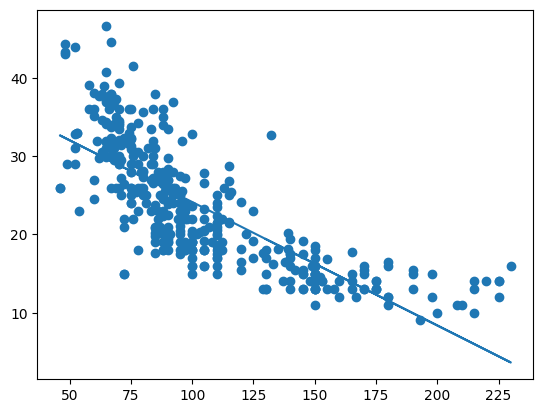

In [25]:
import matplotlib.pyplot as plt

X = auto_df['horsepower']

# Scatter plot ของ x และ y
plt.scatter(X, y)

# เส้นของ linear regression
plt.plot(X, y_pred);